# Analiza podatkov iz hribi.net

Za projektno bom analiziral podatke iz [hribi.net](https://www.hribi.net/). Podatke sem zbral za vse države, ki so bile na voljo in za katere so bili na voljo podatki. To vključuje Slovenijo, med drugimi pa tudi Avstrijo, Italijo, Hrvaško, Grčijo in druge. Analiziral bom:

- Gore
- Poti

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 15)

gore = pd.read_csv("gore.csv", index_col="id")

Za začetek si oglejmo 15 najvišjih slovenskih vrhov.

In [282]:
slovenske_gore = gore[gore["država"].str.contains("Slovenija") & gore["vrsta"].str.contains("vrh")].copy().sort_values("višina", ascending=False)
slovenske_gore[["ime", "višina"]].head(15)

,ime,višina
id,,
101,Triglav,2864
102,Škrlatica,2740
103,Mali Triglav,2725
104,Mangart,2679
105,Visoki Rokav,2646
106,Jalovec,2645
107,Veliki Oltar,2621
108,Velika Martuljška Ponca,2602
109,Razor,2601


Seveda je Triglav najvišji, opazimo pa lahko tudi, da vsi vrhovi segajo krepko čez 2000 metrov nadmorske višine. Pojavi se nam naslednje vprašanje:

### Koliko dvatisočakov se nahaja v Sloveniji?

In [209]:
slovenski_dvatisocaki = slovenske_gore[slovenske_gore["višina"] >= 2000]
len(slovenski_dvatisocaki)

198

Imamo torej skoraj 200 dvatisočakov.

### Porazdelitev slovenskih gor po višini

Oglejmo si sedaj, koliko vrhov posameznih višin imamo. Za lažji prikaz bomo zaokrožili višino na stotice. 

<Axes: title={'center': 'Število vrhov v odvisnosti od višine'}, xlabel='Zaokrožena višina', ylabel='Število vrhov'>

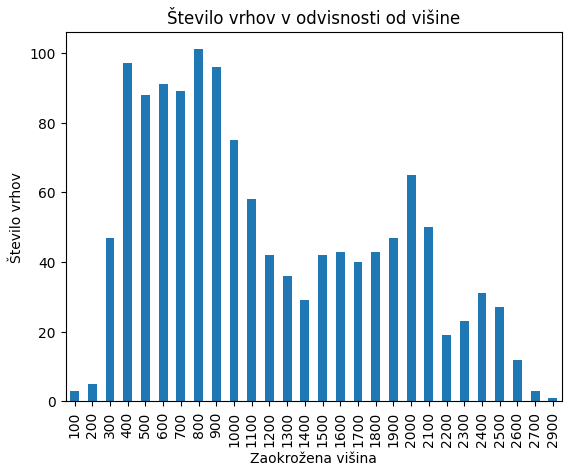

In [252]:
zaokrozena_visina = gore["višina"].round(-2)
gore["zaokrožena višina"] = zaokrozena_visina
slovenske_gore["zaokrožena višina"] = zaokrozena_visina

po_visini = slovenske_gore.groupby("zaokrožena višina").size()
po_visini.plot.bar(title="Število vrhov v odvisnosti od višine",xlabel="Zaokrožena višina", ylabel="Število vrhov")

Največ je vrhov višine 800 m, veliko je tudi vrhov med 400 m in 900 m. Zanimivo je, da število gor po 900 m višine nekaj časa vpada, potem pa zopet zraste.

### Ločitev na gorovja

Ali so katera gorovja višja od drugih? Za začetek si poglejmo povprečno višino gor v vsakem gorovju.

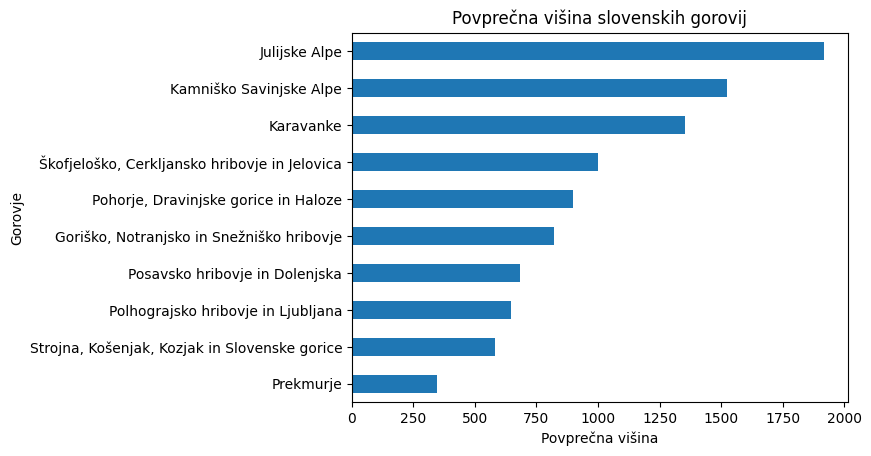

In [253]:
po_gorovju = slovenske_gore.groupby("gorovje")["zaokrožena višina"].mean()
graf = po_gorovju.sort_values().plot.barh(title="Povprečna višina slovenskih gorovij", xlabel="Povprečna višina", ylabel="Gorovje")
#for container in graf.containers:
#    graf.bar_label(container)

Kot pričakovano, so Julijske Alpe na prvem mestu. Presenetljivo pa je, da je razlika med povprečno višino gore iz Julijskih Alp in gore iz Kamniško Savinjskih Alp večja, kakor je razlika med povprečno višino gore iz Karavank ter hriba iz Škofjeloškega, Cerkljanskega hribovja in Jelovice.

Primerjajmo porazdelitev vrhov glede na gorovje, v tem primeru Julijskih Alp, Karavank in Kamniško Savinjskih Alp. Ostala gorovja so bila zaradi posledične nepreglednosti grafa izpuščena.

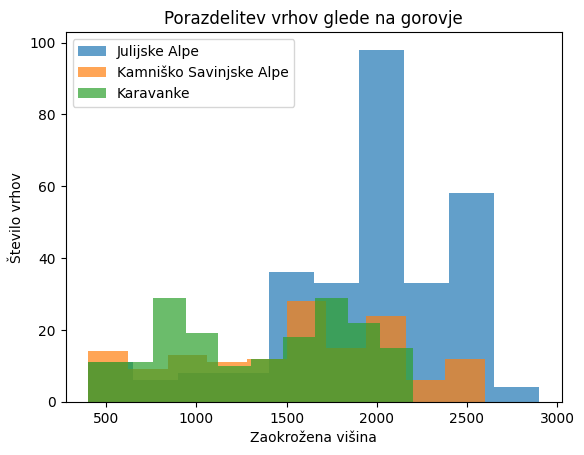

In [285]:
pogoj_za_ja_k_ksa = ((slovenske_gore["gorovje"] == "Julijske Alpe") | (slovenske_gore["gorovje"] == "Karavanke") | (slovenske_gore["gorovje"] == "Kamniško Savinjske Alpe"))
julijske_karavanke_kamnisko_savinjske_alpe = slovenske_gore[pogoj_za_ja_k_ksa]

graf_primerjava = julijske_karavanke_kamnisko_savinjske_alpe.groupby("gorovje")["zaokrožena višina"].plot.hist(
    title="Porazdelitev vrhov glede na gorovje", xlabel="Zaokrožena višina", ylabel="Število vrhov", legend=True, alpha=0.7)

Vidimo, da poleg dejstva, da je povprečni vrh iz Julijskih Alp najvišji (kar smo ugotovili že pri prejšnjem grafu), so tudi gore v Julijskih Alpah občutno višje od gor v Kamniško Savinjskih Alpah in Karavankah. 

### Kakšna je razporeditev vrhov po gorovjih?

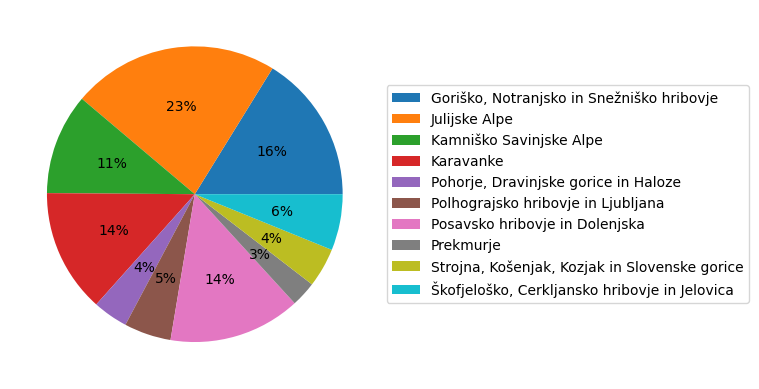

In [286]:
po_gorovju_st_vrhov = slovenske_gore.groupby("gorovje").size()
graf_po_gorovju_st_vrhov = po_gorovju_st_vrhov.plot.pie(legend=True, autopct='%1.0f%%', labels=None)
graf_po_gorovju_st_vrhov.legend(po_gorovju_st_vrhov.index, loc="center left", bbox_to_anchor=(1.0, 0.5))


Kaj pa po državah?

<Axes: xlabel='Država', ylabel='Število gor'>

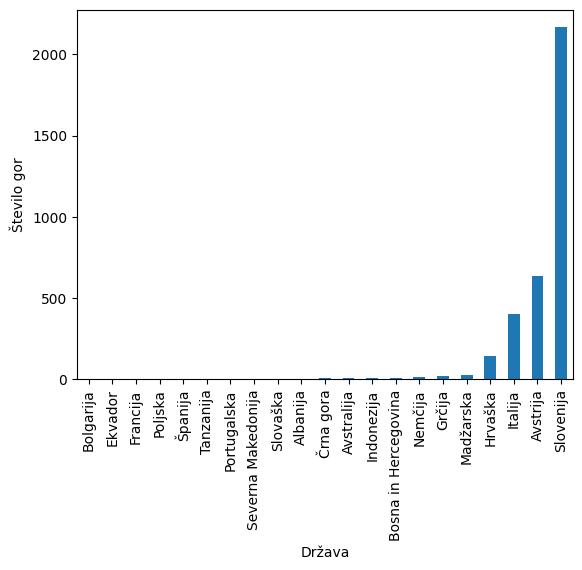

In [287]:
gore_razbito = gore.copy()
gore_razbito['država'] = gore['država'].str.split(', ')     #popravimo, ker nekatere gore vsebujejo več držav
gore_razbito = gore_razbito.explode('država')

po_drzavi_st_vrhov = gore_razbito.groupby("država").size()
po_drzavi_st_vrhov.sort_values().plot.bar(xlabel="Država", ylabel="Število gor")

Podatki so očitno osredotočeni na ozemlje okoli Slovenije.